# Lab 2

# Turning biology into mathematics

In this lab demonstration we will access the uniprot database and create a new dataset. Our dataset will consist of four thousand proteins, half associated with the keyword antibody and the other half not related to the keyword. The proteins are represented by their primary structure sequence of amino acids, in other words each protein is a string of letters representing each amino acid in the sequence. (Don't worry if these ideas are new to you.)

The one-letter and three-letter codes for amino acids used in the knowledgebase are those adopted by the commission on Biochemical Nomenclature of the IUPAC-IUB

One-letter code	Three-letter code	Amino-acid name

A	Ala	  Alanine

R	Arg	  Arginine

N	Asn	  Asparagine

D	Asp	  Aspartic acid

C	Cys	  Cysteine

Q	Gln	  Glutamine

E	Glu	  Glutamic acid

G	Gly	  Glycine

H	His	  Histidine

I	Ile	  Isoleucine

L	Leu	  Leucine

K	Lys	  Lysine

M	Met	  Methionine

F	Phe	  Phenylalanine

P	Pro	  Proline

S	Ser	  Serine

T	Thr	  Threonine

W	Trp	  Tryptophan

Y	Tyr	  Tyrosine

V	Val	  Valine

O	Pyl	  Pyrrolysine

U	Sec	  Selenocysteine

B	Asx	  Aspartic acid or Asparagine

Z	Glx	  Glutamic acid or Glutamine

X	Xaa	  Any amino acid


In [2]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-0kqpox9n
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-0kqpox9n
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7322 sha256=900b850f2af28c0c5d02dc350fe009e75a7928f4d86b5912b5b663129fe2acb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-za4gbx4e/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# This code will create a dataset from the uniprot database
X, Y = get_uniprot_data('=antibody', '!antibody', 2000)

In [5]:
number_X = len(X)
number_Y = len(Y)

In [6]:
print(number_X)
print(number_Y) #there are 2000 antibodies and 2000 non-antibodies in the dataset

2000
2000


In [7]:
X[92] #Amino acid sequence of the first protein on the list of proteins associated with 'antibody'
#len(X[92])

'mkeqpvlerlqsqkswikgvfdkrecstiipssknphrctpvcqvcqnlircycgrligdhagidyswtisaakgkeseqwsvekhttksptdtfgtinfqdgehthhakyirtsydtkldhllhlmlkewkmelpklvisvhggiqnftmpskfkeifsqglvkaaettgawiitegintgvskhvgdalkshsshslrkiwtvgippwgvienqrdligkdvvclyqtldnplsklttlnsmhshfilsddgtvgkygnemklrrnlekylslqkihcrsrqgvpvvglvveggpnvilsvwetvkdkdpvvvcegtgraadllafthkhladegmlrpqvkeeiicmiqntfnfslkqskhlfqilmecmvhrdcitifdadseeqqdldlailtallkgtnlsaseqlnlamawdrvdiakkhiliyeqhwkpdaleqamsdalvmdrvdfvkllieygvnlhrfltiprleelyntkqgptntllhhlvqdvkqhtllsgyritlidiglvveyligrayrsnytrkhfralynnlyrkykhqrhssgnrnesaestlhsqfirtaqpykfkeksivlhksrkkskeqnvsddpestgflypyndllvwavlmkrqkmamffwqhgeeatvkaviacilyramaheakeshmvddaseelknyskqfgqlaldllekafkqnermamtlltyelrnwsnstclklavsgglrpfvshtctqmlltdmwmgrlkmrknswlkiiisiilpptiltlefkskaemshvpqsqdfqfmwyysdqnassskesasvkeydlerghdekldenqhfglesghqhlpwtrkvyefysapivkfwfytmaylaflmlftytvlvemqpqpsvqewlvsiyiftnaievvreicisepgkftqkvkvwiseywnltetvaiglfsagfvlrwgdppfhtagrliycidiifwfsrlldffavnqhagpyvtmiakmtanmfyiviimaivllsfgvarkail

Turn protein strings of letters into vectors of numbers:

In [9]:
def process_strings(c):
    '''Takes in a list of sequences 'c' and turns each one
       into a list of numbers.'''
       
    X = []
            
    for  m, seq in enumerate(c):
        x = [] 
        for letter in seq:
            x.append(max(ord(letter)-97, 0)) #converts to unicode and subtracts 97. appends to the array zero or the subtracted unicode value based on whichever is max
        
        X.append(x)
        
    return X

In [10]:
X = process_strings(X)
Y = process_strings(Y)

In [11]:
print(X[1]) #shows the unicode value of an amino acid sequence of an antibody protein

[12, 4, 18, 6, 19, 18, 18, 15, 16, 15, 15, 16, 11, 3, 15, 11, 3, 0, 5, 15, 16, 10, 6, 11, 4, 15, 6, 3, 8, 0, 21, 11, 21, 11, 24, 5, 11, 5, 21, 11, 0, 21, 6, 11, 22, 18, 19, 21, 10, 19, 10, 17, 3, 19, 21, 10, 6, 24, 5, 11, 0, 6, 6, 3, 12, 21, 22, 22, 15, 21, 6, 0, 18, 11, 5, 0, 18, 13, 21, 6, 18, 6, 7, 5, 8, 6, 11, 0, 6, 18, 6, 0, 0, 19, 6, 8, 18, 21, 18, 0, 24, 4, 11, 13, 6, 11, 5, 18, 21, 11, 12, 11, 0, 22, 8, 5, 11, 15, 8, 24, 8, 0, 6, 16, 21, 19, 19, 12, 15, 4, 24, 11, 17, 10, 17, 5, 6, 6, 8, 17, 8, 15, 8, 8, 11, 0, 21, 11, 24, 11, 5, 8, 24, 8, 5, 19, 10, 8, 18, 21, 3, 12, 24, 0, 6, 0, 8, 5, 8, 16, 16, 18, 11, 7, 11, 3, 11, 24, 11, 0, 8, 21, 6, 11, 11, 0, 8, 19, 0, 21, 24, 19, 21, 0, 6, 6, 11, 0, 0, 21, 8, 24, 19, 3, 0, 11, 16, 19, 11, 8, 12, 11, 8, 6, 0, 11, 19, 11, 12, 6, 24, 18, 5, 0, 0, 21, 6, 6, 12, 4, 6, 11, 10, 4, 10, 24, 5, 11, 0, 11, 0, 18, 13, 17, 18, 4, 13, 18, 18, 2, 6, 11, 15, 17, 4, 3, 0, 5, 7, 8, 5, 17, 3, 15, 11, 19, 18, 3, 11, 15, 22, 15, 6, 21, 11, 5, 6, 12, 18, 8,

In [12]:
print(Y[0]) #shows the unicode value of an amino acid sequence of a non-antibody (protein sizes vary in length so the sequences maybe longer or shorter depending on it)

[12, 4, 0, 11, 21, 24, 19, 5, 11, 11, 21, 6, 19, 11, 6, 8, 8, 5, 5, 18, 8, 5, 5, 17, 3, 15, 15, 17, 12, 8, 10]


(array([109.,   0.,   8.,  70., 139.,  38.,  34.,  11.,  49.,   0.,  75.,
        106.,  16.,  31.,   0., 104.,  31.,  29., 144.,  61.,   0.,  79.,
          4.,   0.,  25.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

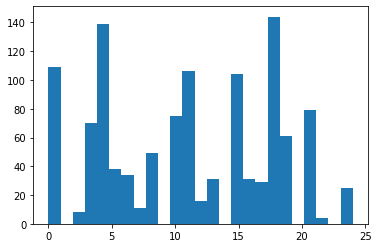

In [14]:
plt.hist(X[0],25) #plots the composition of amino acids converted in unicodes in the protein as a histogram

(array([1., 0., 0., 1., 1., 5., 2., 0., 4., 0., 1., 4., 2., 0., 0., 2., 0.,
        2., 1., 2., 0., 2., 0., 0., 1.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

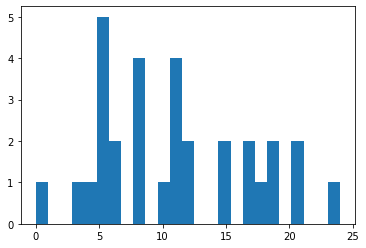

In [16]:
plt.hist(Y[0],25) #plots the composition of amino acids in the antibody as a histogram

In [17]:
np.mean(X[0]),np.std(X[0]) #meaningful? this is not meaningful

(11.00859845227859, 6.89123922101607)

In [18]:
np.array(X[0]).shape

(1163,)

Find lengths of all proteins:

In [19]:
X_lengths = [len(s) for s in X] #list of all protein length
Y_lengths = [len(s) for s in Y] #list of all antibody lengths

In [20]:
np.max(X_lengths) #finds the antibody with the largest amino acid sequence

5654

In [21]:
np.max(Y_lengths) #finds the largest non-antibody protein

6631

In [22]:
np.min(X_lengths) #shortest antibody

5

In [23]:
np.min(Y_lengths) #shortest non-anitbody

6

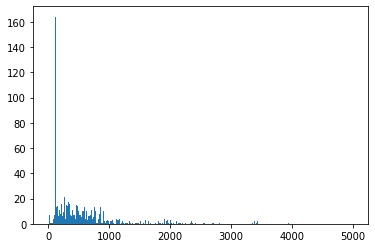

In [24]:
plt.hist(X_lengths,bins=1000,range=(0,5000)); #plots histogram of the protein lengths in the database

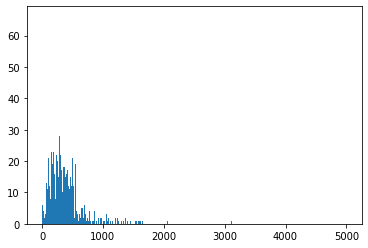

In [ ]:
plt.hist(Y_lengths,bins=1000,range=(0,5000));  #plots histogram of the non-antibody lengths in the database